In [13]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
import scipy.stats as stats

## Dot product

In [2]:
nv1 = np.array([1, 2, 3, 4])
nv2 = np.array([0, 1, 0, -1])

print(np.dot(nv1, nv2))

print(np.sum(nv1 * nv2))

-2
-2


In [3]:
tv1 = torch.tensor([1, 2, 3, 4])
tv2 = torch.tensor([0, 1, 0, -1])

print(torch.dot(tv1, tv2))
print(torch.sum(tv1 * tv2))

tensor(-2)
tensor(-2)


## Entropy

$$
H(p) = -\sum_xp(x)\log{p(x)}
$$

In [4]:
x = [0.25, 0.75]

H = 0

for p in x:
    H -= p * np.log(p)

print(H)

0.5623351446188083


In [5]:
p = [1.0, 0.0]
q = [0.25, 0.75]

H = 0
for i in range(len(p)):
    H -= p[i] * np.log(q[i])

print(H)

1.3862943611198906


In [6]:
import torch.nn.functional as F

q_tensor = torch.tensor(q)
p_tensor = torch.tensor(p)

F.binary_cross_entropy(p_tensor, q_tensor)

tensor(75.)

## Softmax

In [7]:
z = [1, 2, 3]

num = np.exp(z)
den = np.sum(num)
sigma = num / den

print(sigma)
print(np.sum(sigma))

[0.09003057 0.24472847 0.66524096]
1.0


[-3  0  1  6  4  4 13  2 -3  5  2  1 12  1  6  6  0  0  6 -5 -4 11  8 -4
  1]


<>:11: SyntaxWarning: invalid escape sequence '\s'
<>:13: SyntaxWarning: invalid escape sequence '\s'
<>:11: SyntaxWarning: invalid escape sequence '\s'
<>:13: SyntaxWarning: invalid escape sequence '\s'
/var/folders/fx/39y8j8751j37c9vmjzj_2ftm0000gn/T/ipykernel_77543/2106769564.py:11: SyntaxWarning: invalid escape sequence '\s'
  plt.ylabel('Softmax $\sigma$')
/var/folders/fx/39y8j8751j37c9vmjzj_2ftm0000gn/T/ipykernel_77543/2106769564.py:13: SyntaxWarning: invalid escape sequence '\s'
  plt.title('$\sum\sigma=1$')


Text(0.5, 1.0, '$\\sum\\sigma=1$')

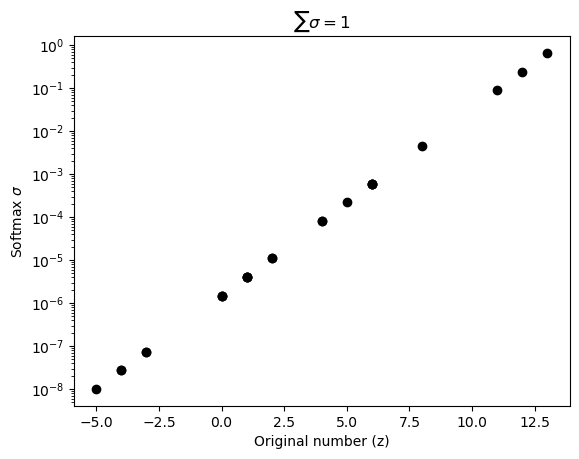

In [8]:
z = np.random.randint(-5, high = 15, size = 25)
print(z)

num = np.exp(z)
den = np.sum(np.exp(z))
sigma = num / den


plt.plot(z, sigma, 'ko')
plt.xlabel('Original number (z)')
plt.ylabel('Softmax $\sigma$')
plt.yscale('log')
plt.title('$\sum\sigma=1$')

In [9]:
softfun = nn.Softmax(dim=0)

sigmaT = softfun(torch.Tensor(z))

print(sigmaT)

tensor([7.4318e-08, 1.4927e-06, 4.0576e-06, 6.0220e-04, 8.1499e-05, 8.1499e-05,
        6.6039e-01, 1.1030e-05, 7.4318e-08, 2.2154e-04, 1.1030e-05, 4.0576e-06,
        2.4295e-01, 4.0576e-06, 6.0220e-04, 6.0220e-04, 1.4927e-06, 1.4927e-06,
        6.0220e-04, 1.0058e-08, 2.7340e-08, 8.9375e-02, 4.4497e-03, 2.7340e-08,
        4.0576e-06])


Text(0.5, 1.0, 'The two methode correlate at r=1.0')

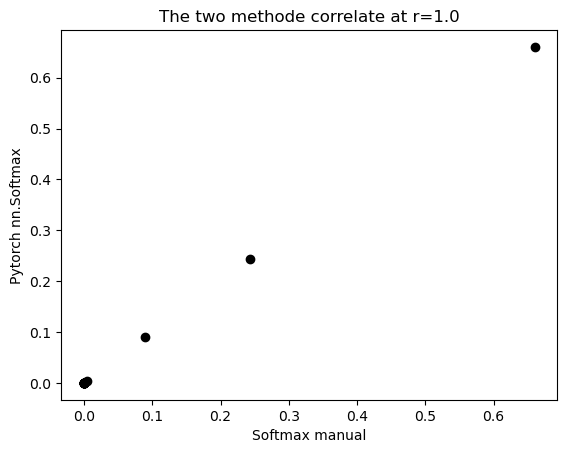

In [10]:
plt.plot(sigma, sigmaT, 'ko')
plt.xlabel('Softmax manual')
plt.ylabel('Pytorch nn.Softmax')
plt.title(f'The two methode correlate at r={np.corrcoef(sigma, sigmaT)[0, 1]}')

## t-test

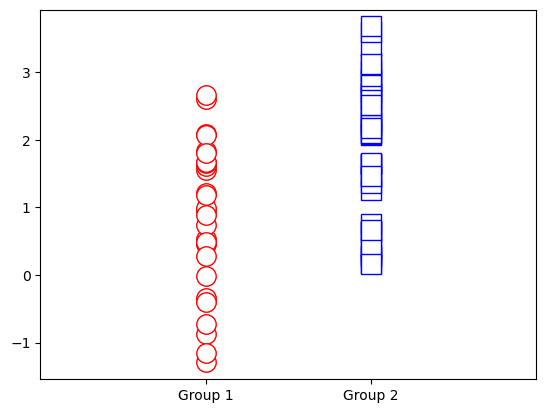

In [39]:
n1 = 30
n2 = 40
mu1 = 1
mu2 = 2

data1 = mu1 + np.random.randn(n1)
data2 = mu2 + np.random.randn(n2)



plt.plot(np.zeros(n1), data1, 'ro', markerfacecolor='w', markersize=14)
plt.plot(np.ones(n2), data2, 'bs', markerfacecolor='w', markersize=14)
plt.xlim([-1, 2])
plt.xticks([0, 1], labels = ['Group 1', 'Group 2'])
plt.show()

In [40]:
t, p = stats.ttest_ind(data1, data2)
print(t)
print(p)

-4.240817261919404
6.884766697324791e-05


Text(0.5, 1.0, 't = -4.24, p=0.000')

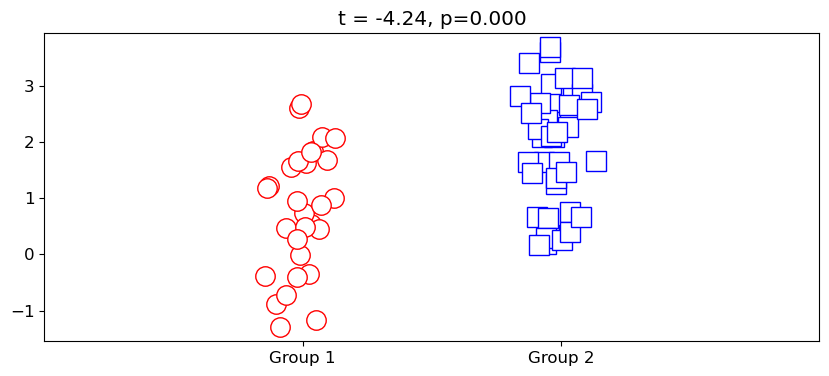

In [ ]:
fig = plt.figure(figsize=(10, 4))

plt.plot(0 + np.random.randn(n1) / 15, data1, 'ro', markerfacecolor='w', markersize=14)
plt.plot(1+np.random.randn(n2)/15, data2, 'bs',markerfacecolor='w',markersize=14)
plt.xlim([-1, 2])
plt.xticks([0, 1], labels=['Group 1', 'Group 2'])

plt.title(f't = {t:.2f}, p={p:.3f}')